In [ ]:
# Impor library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.preprocessing import StandardScaler
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import ConvexHull
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [ ]:
#Memasukkan dataset
dataset = pd.read_csv('/content/df_dewi.csv')
dataset

,kode,exp_return,risiko,mean_vol
0,AALI,-0.94107,-0.44408,-0.76606
1,ACES,-1.61307,-0.48143,-0.37161
2,ADHI,-1.33412,0.10599,-0.42100
3,ADRO,0.87662,-0.15298,0.90426
4,AGII,1.25263,0.42221,-0.64475
...,...,...,...,...
70,TPIA,-0.45320,-0.60192,-0.57971
71,UNTR,0.18015,-0.45102,-0.72692
72,UNVR,-1.14776,-0.66843,-0.46047
73,WIKA,-1.32319,0.02114,-0.26713


In [ ]:
# Mengambil 3 nilai variabel untuk di prediksi
X = dataset.iloc[:,[1,2,3]].values

In [ ]:
# membuat array untuk tiap variabel untuk plotting
sb_x = dataset.iloc[:,[1]].values #exp return
sb_y = dataset.iloc[:,[2]].values #risiko
sb_z = dataset.iloc[:,[3]].values #mean vol

In [ ]:
# melakukan clustering menggunakan mean_shift
bandwidth = estimate_bandwidth(X)
model = MeanShift(bandwidth=bandwidth)
model.fit(X)
pred = model.fit_predict(X)

labels = model.labels_
labels = np.array([x+1 for x in labels])
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("Banyaknya cluster yang terbentuk : {} ".format(n_clusters_))
print("Bandwidth yang digunakan dalam model : {}".format(bandwidth))
print("Label tiap data : {}".format(labels))

Banyaknya cluster yang terbentuk : 5 
Bandwidth yang digunakan dalam model : 1.3251841624659595
Label tiap data : [1 1 1 5 1 1 1 5 1 1 2 1 1 1 5 1 1 1 3 4 1 1 1 1 1 3 1 1 1 3 1 3 1 1 1 1 3
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 2 3 1 1 1 1 1 1 1 1 1 1 1 1
 1]


In [ ]:
#Menambahkan kolom cluster_label ke dataset awal
dataset['cluster_label'] = labels
dataset.head()

,kode,exp_return,risiko,mean_vol,cluster_label
0,AALI,-0.94107,-0.44408,-0.76606,1
1,ACES,-1.61307,-0.48143,-0.37161,1
2,ADHI,-1.33412,0.10599,-0.42100,1
3,ADRO,0.87662,-0.15298,0.90426,5
4,AGII,1.25263,0.42221,-0.64475,1


In [ ]:
# melihat titik cluster center tiap klaster yang terbentuk
cluster_centers = model.cluster_centers_
sb_xc = cluster_centers[:,0]
sb_yc = cluster_centers[:,1]
sb_zc = cluster_centers[:,2]

print('ini cluster_center :\n{}\n'.format(cluster_centers))
# print('ini sb_xc :\n{}\n'.format(sb_xc))
# print('ini sb_yc :\n{}\n'.format(sb_yc))
# print('ini sb_zc :\n{}\n'.format(sb_zc))

ini cluster_center :
[[-0.45376776 -0.30761082 -0.28798571]
 [ 0.0837      5.391025   -0.529725  ]
 [ 2.38276     0.51504     1.54627   ]
 [ 1.41375     0.40029     6.41971   ]
 [ 0.8469      0.23571     2.33012   ]]



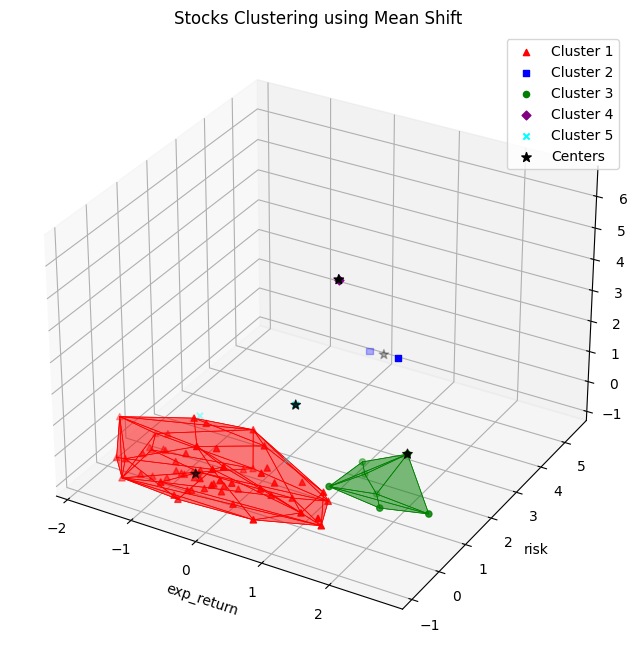

In [ ]:
 colors = ['red', 'blue', 'green', 'purple','cyan']  # Atur warna klaster sesuai kebutuhan
markers = ['^', 's', 'o', 'D', 'x']  # Atur simbol klaster sesuai kebutuhan

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for i in range(len(cluster_centers)):
    cluster_number = i + 1
    cluster_data = dataset[dataset['cluster_label'] == cluster_number]
    ax.scatter(cluster_data['exp_return'], cluster_data['risiko'], cluster_data['mean_vol'], label=f'Cluster {cluster_number}', c=colors[i], marker=markers[i])

    points = cluster_data[['exp_return', 'risiko', 'mean_vol']].values
    if len(points) >= 4:
        hull = ConvexHull(points)
        for simplex in hull.simplices:
            simplex = np.append(simplex, simplex[0])  # Menambahkan kembali titik awal untuk menutup kurva
            ax.plot(points[simplex, 0], points[simplex, 1], points[simplex, 2], color=colors[i],linewidth=0.5)

            # Mewarnai sisi terluar dari kurva wilayah
            vertices = [(points[simplex, 0][j], points[simplex, 1][j], points[simplex, 2][j]) for j in range(len(simplex))]
            poly3d = [[vertices[j] for j in range(len(simplex))]]
            ax.add_collection3d(Poly3DCollection(poly3d, facecolors=colors[i], linewidths=0.5, alpha=0.3))


ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], cluster_centers[:, 2], label="Centers", c="k", marker="*", s=50)
ax.set_xlabel('exp_return')
ax.set_ylabel('risk')
ax.set_zlabel('mean_vol')
ax.set_title('Stocks Clustering using Mean Shift')
ax.legend()
plt.show()

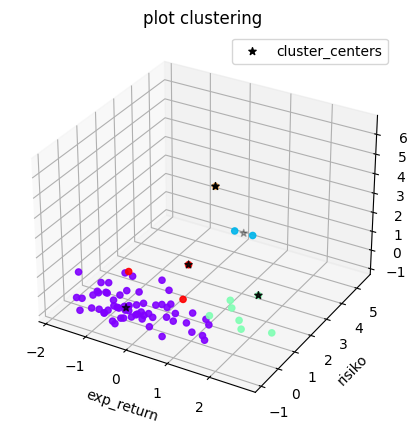

In [ ]:
# Membuat plot 3D untuk klasterisasi
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(projection='3d')

# Create the 3D surface plot
sb_data = ax.scatter(sb_x, sb_y, sb_z, c=pred, cmap='rainbow', alpha=0.9)
sb_centroid = ax.scatter(sb_xc, sb_yc, sb_zc , c= 'black', label='cluster_centers', marker='*',s=30)

# Add labels and title
ax.set_xlabel('exp_return')
ax.set_ylabel('risiko')
ax.set_zlabel('mean_vol')
ax.set_title('plot clustering')



# Display the plot
plt.legend()
plt.show()
plt.show()

In [ ]:
#Menambahkan kolom cluster ke dataset awal
dataset['cluster'] = pred
dataset['cluster'] = dataset['cluster'].replace([0,1,2,3,4,5,6,7,8],[1,2,3,4,5,6,7,8,9])
# dataset.head()

#Melihat list saham tiap cluster lebih jelas
print("Berikut adalah list saham pada tiap cluster yang terbentuk :")

for i in range (1,6):
  cluster = dataset[dataset['cluster'] == i]
  cluster_bersih = cluster.iloc[:,0].values
  print("Cluster {no} : \n {data} \n--------------".format(no=i,data=cluster_bersih))

Berikut adalah list saham pada tiap cluster yang terbentuk :
Cluster 1 : 
 ['AALI' 'ACES' 'ADHI' 'AGII' 'AKRA' 'AMRT' 'ASII' 'ASSA' 'BACA' 'BBCA'
 'BBNI' 'BBTN' 'BFIN' 'BMRI' 'BRPT' 'BSDE' 'BTPS' 'CPIN' 'CTRA' 'DOID'
 'DSNG' 'EMTK' 'ERAA' 'EXCL' 'GGRM' 'HEAL' 'HMSP' 'ICBP' 'INCO' 'INDF'
 'INDY' 'INKP' 'INTP' 'ISAT' 'ITMG' 'JPFA' 'JSMR' 'KLBF' 'LPPF' 'LSIP'
 'MAPI' 'MEDC' 'MIKA' 'MNCN' 'PGAS' 'PTBA' 'PTPP' 'PWON' 'SCMA' 'SMGR'
 'SMRA' 'SRTG' 'TBIG' 'TINS' 'TKIM' 'TLKM' 'TOWR' 'TPIA' 'UNTR' 'UNVR'
 'WIKA' 'WSKT'] 
--------------
Cluster 2 : 
 ['ARTO' 'SIDO'] 
--------------
Cluster 3 : 
 ['BRIS' 'DMMX' 'ENRG' 'ESSA' 'HRUM' 'MDKA' 'SMDR'] 
--------------
Cluster 4 : 
 ['BRMS'] 
--------------
Cluster 5 : 
 ['ADRO' 'ANTM' 'BBRI'] 
--------------


In [ ]:
# Membuat plot 3D untuk klasterisasi
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(projection='3d')

# # Create the 3D surface plot
# sb_data = ax.scatter(sb_x, sb_y, sb_z, c=pred, cmap='rainbow', alpha=0.9)
# sb_centroid = ax.scatter(sb_xc, sb_yc, sb_zc , c= 'black', label='cluster_centers', marker='*')

# # Add labels and title
# ax.set_xlabel('exp_return')
# ax.set_ylabel('risiko')
# ax.set_zlabel('mean_vol')
# ax.set_title('plot clustering')

ax.scatter(X[pred == 0,0], X[pred==0,1], s=100, c='red',label='clusetr1')

# Display the plot
plt.legend()
plt.show()
plt.show()